# Problem Sheet 3

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

## AIC for Linear Models

For the first problem in problem sheet 3, we are asked to derive the AIC (Akaike Information Criterion) expression for the linear model 

$$
    {\bf y} \sim \mathcal{N}_N({\bf X}\boldsymbol\beta, \sigma^2{\bf I})
$$

Recalling that the AIC is defined as:

$$
    \text{AIC} = 2k - 2\log\hat{\mathcal{L}}
$$

Where $k$ is the number of parameters and $\hat{\mathcal{L}}$ is the likelihood function evaluated at its maximum value, we see that the AIC takes the form

$$
\begin{aligned}
    \text{AIC} 
    &= 2k - N\log(2\pi\sigma^2) + \sigma^{-2}{\bf y}^T({\bf y} - {\bf X}({\bf X}^T {\bf X})^{-1} {\bf X}^T {\bf y})\\
    &= 2k - N\log(2\pi\sigma^2) + \sigma^{-2}{\bf y}^T({\bf y} - {\bf X}\hat{\boldsymbol \beta})\\
    &= 2k - N\log(2\pi\sigma^2) + \sigma^{-2}{\bf y}^T({\bf y} - \hat{\bf y})\\
\end{aligned}
$$


In [53]:
## An example ##
np.random.seed(314)
n_obs = 40
sigma2 = 0.7
beta = np.array([0.3, 1.3, -2.3, -1.5])
x = np.linspace(-2.1, 1.6, n_obs) + 2 * (np.random.rand(n_obs) - 1) / 10
# The true Basis function 
Phi = np.array([x ** 0, x ** 1, x ** 2, x ** 3])

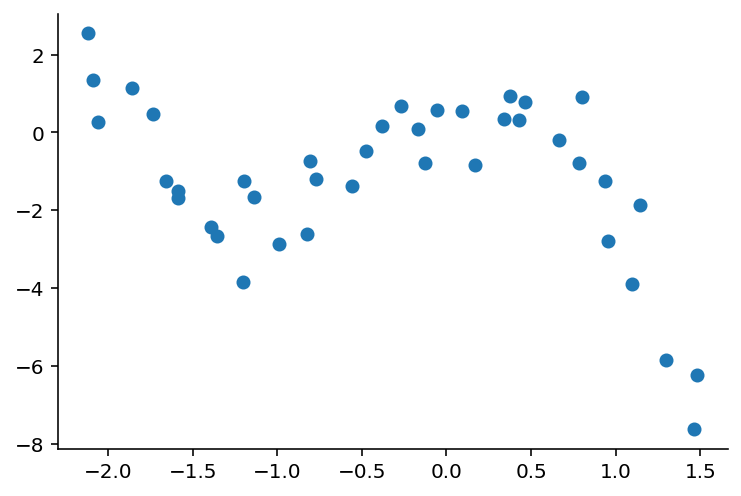

In [56]:
y = np.einsum("m,mn->n", beta, Phi) + np.random.randn(n_obs) * np.sqrt(sigma2)
plt.scatter(x, y)

In [109]:
def aic(y, yhat, k, sigma2):
    N = len(y)
    AIC = 2 * k - N * np.log(2 * np.pi * sigma2) + np.sum(y * (y - yhat)) / sigma2
    return AIC

def create_feature_matrix(x, p=1):
    X = [x ** pi for pi in range(p + 1)]
    X = np.array(X)
    return X.T


def fit_regression(X, y):
    beta_hat = inv(X.T @ X) @ X.T  @ y
    return beta_hat

In [147]:
poly_values = np.arange(6)

xtest = np.linspace(-2, 1.5, 100)

estimations_list = []
aic_list = [] 
for p in poly_values:
    X = create_feature_matrix(x, p=p)
    beta_hat = fit_regression(X, y)
    y_hat = np.einsum("nm,m->n", X, beta_hat)
    aic_value = aic(y, y_hat, p, sigma2)
    aic_list.append(aic_value)
    
    X_test = create_feature_matrix(xtest, p=p)
    y_test = np.einsum("nm,m->n", X_test, beta_hat)
    estimations_list.append(y_test)

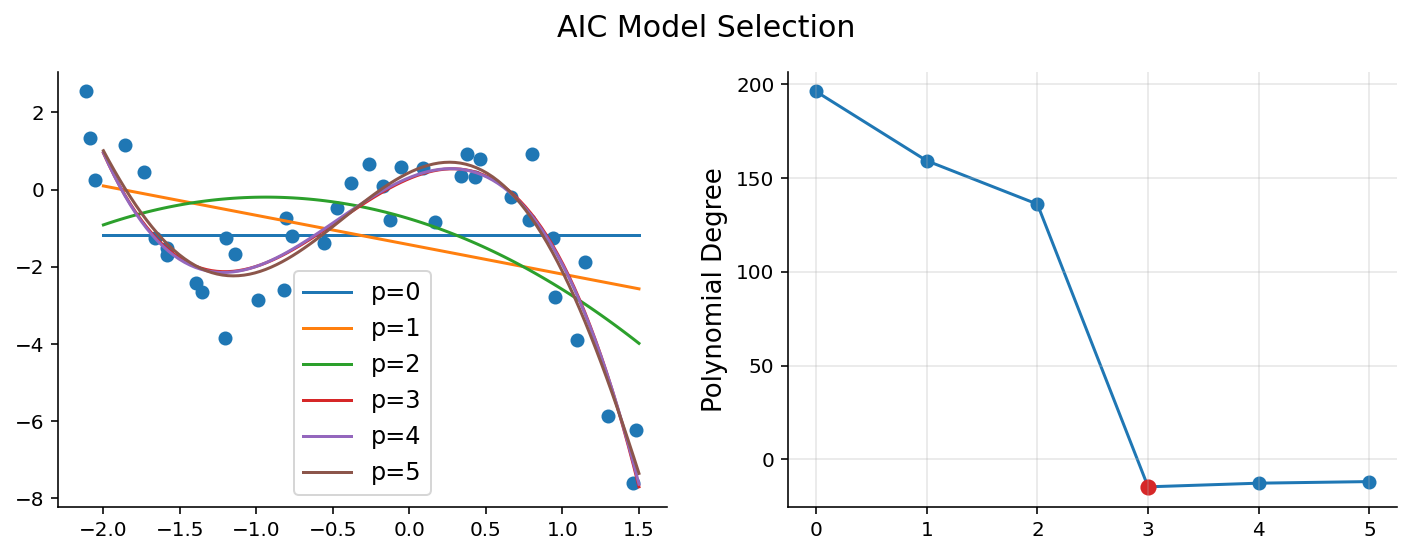

In [181]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))


ax[0].scatter(x, y)
for p, ytest in zip(poly_values, estimations_list):
    ax[0].plot(xtest, ytest, label=f"p={p}")
ax[0].legend(fontsize=12)



ax[1].plot(poly_values, aic_list, marker="o", zorder=-1)
ax[1].set_ylabel("AIC", fontsize=13)
ax[1].set_ylabel("Polynomial Degree", fontsize=13)
ax[1].grid(alpha=0.3)

p_best = np.argmin(aic_list)
ax[1].scatter(poly_values[p_best], aic_list[p_best], s=50, c="tab:red", zorder=1)


plt.suptitle("AIC Model Selection", fontsize=15);

For the linear model with polynomial basis functions, given an extra degree, the improvement is justified by the AIC if the marginal reduction in the term ${\bf y}^T({\bf y} - \hat{\bf y})$ is greater than $2$.